Files generated:
- Sales_Data.csv
- Sales_Trend_Visualization.png
- Sales_By_Category.png
- Sales_By_Region.png
- Payment_Method_Distribution.png
- Sales_Data_Analysis_Report.txt


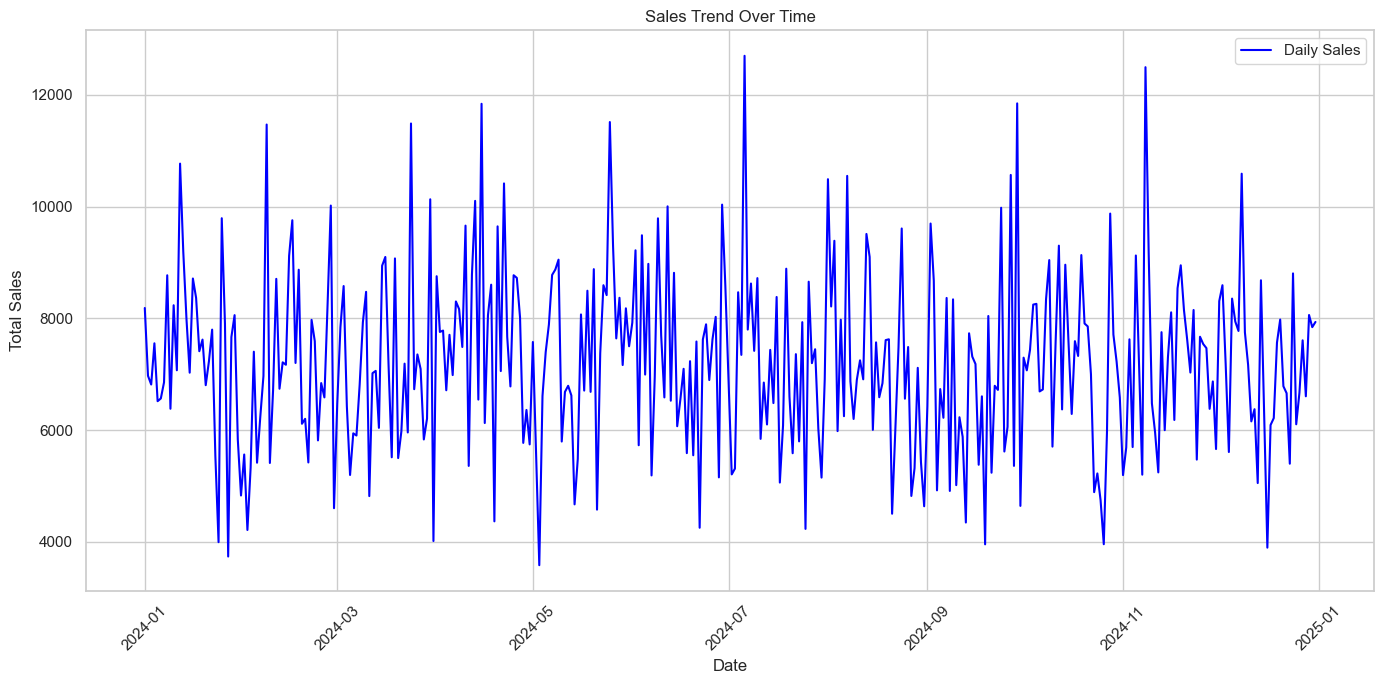

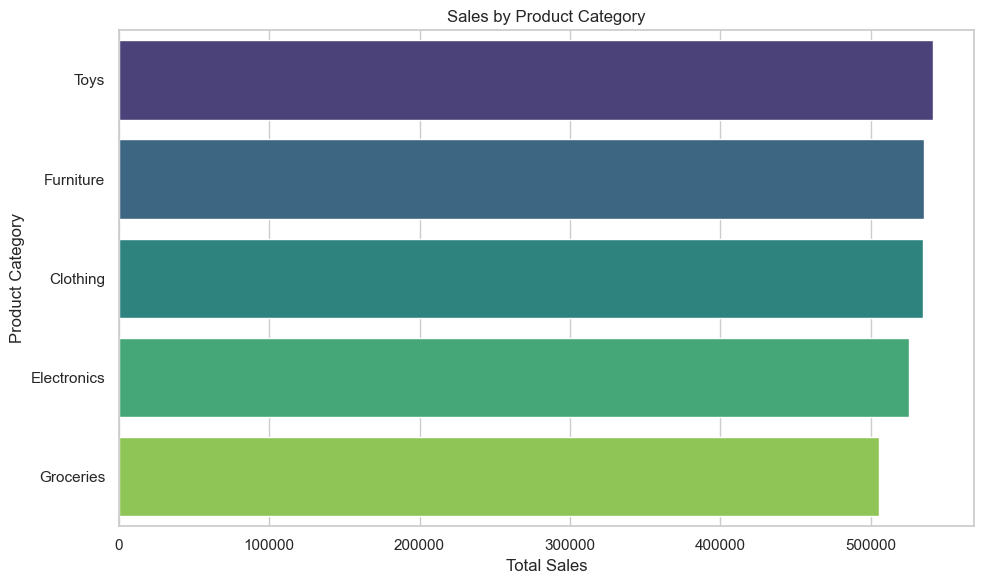

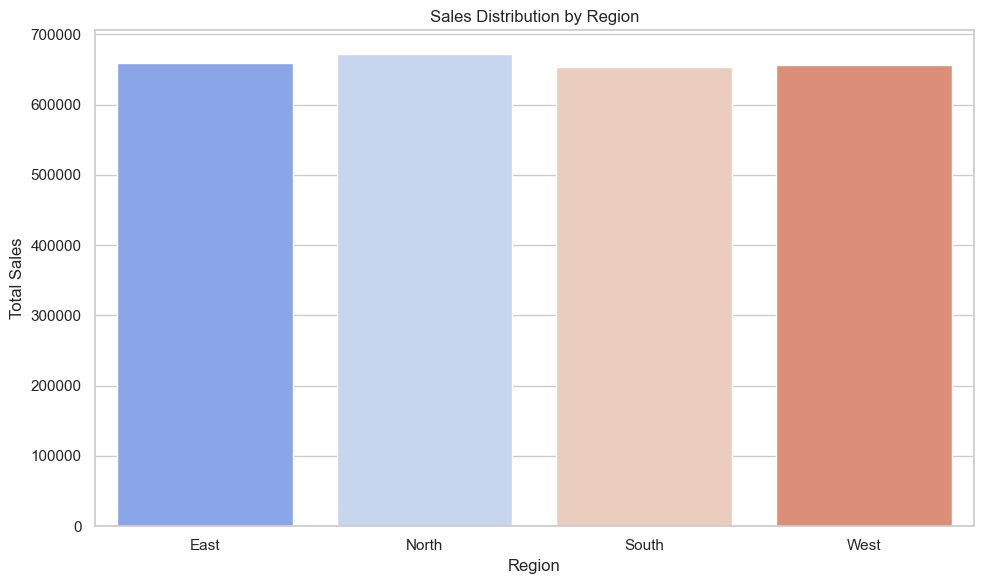

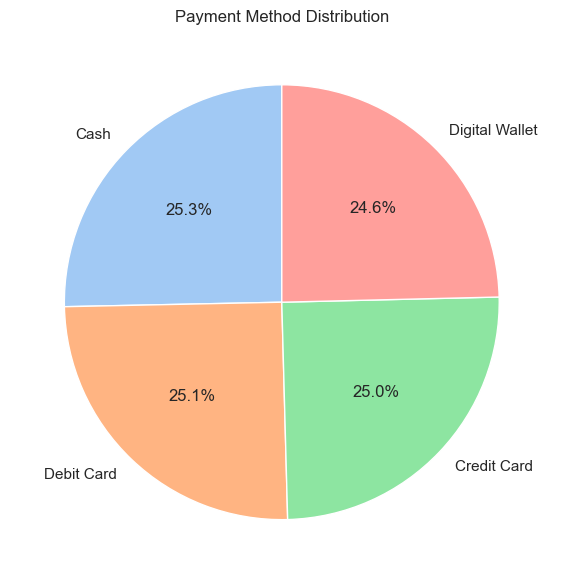

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

categories = ['Electronics', 'Clothing', 'Groceries', 'Furniture', 'Toys']
regions = ['North', 'South', 'East', 'West']
payment_methods = ['Credit Card', 'Debit Card', 'Digital Wallet', 'Cash']


data = {
    'Date': np.random.choice(pd.date_range(start="2024-01-01", end="2024-12-31", freq='D'), 10000),
    'Product_Category': np.random.choice(categories, 10000),
    'Sales_Amount': np.random.uniform(20, 500, 10000).round(2),
    'Units_Sold': np.random.randint(1, 20, 10000),
    'Customer_Segment': np.random.choice(['Retail', 'Wholesale'], 10000),
    'Region': np.random.choice(regions, 10000),
    'Discount_Amount': np.random.uniform(0, 50, 10000).round(2),
    'Payment_Method': np.random.choice(payment_methods, 10000)
}


sales_data = pd.DataFrame(data)


sales_data.to_csv("Sales_Data.csv", index=False)


sns.set_theme(style="whitegrid")
sales_trend = sales_data.groupby('Date')['Sales_Amount'].sum()

plt.figure(figsize=(14, 7))
plt.plot(sales_trend.index, sales_trend.values, color="blue", label="Daily Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("Sales_Trend_Visualization.png")


plt.figure(figsize=(10, 6))
category_sales = sales_data.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.savefig("Sales_By_Category.png")


plt.figure(figsize=(10, 6))
region_sales = sales_data.groupby('Region')['Sales_Amount'].sum()
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("Sales_By_Region.png")


plt.figure(figsize=(8, 6))
payment_counts = sales_data['Payment_Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.tight_layout()
plt.savefig("Payment_Method_Distribution.png")


report_content = """
Sales Data Analysis Report

1. Sales Trend Over Time:
   - Observed fluctuations with specific high-performing days.
   - Peaks may align with promotions or seasonal trends.

2. Sales by Product Category:
   - Electronics and Furniture dominate total sales.
   - Toys lag behind, indicating room for growth.

3. Region-wise Sales Distribution:
   - West and South regions perform the best.
   - North region has potential for strategic improvements.

4. Payment Method Preferences:
   - Credit Card and Digital Wallets are the most used methods.
   - Cash is less frequent, indicating a preference for cashless transactions.
"""

with open("Sales_Data_Analysis_Report.txt", "w") as file:
    file.write(report_content)

print("Files generated:")
print("- Sales_Data.csv")
print("- Sales_Trend_Visualization.png")
print("- Sales_By_Category.png")
print("- Sales_By_Region.png")
print("- Payment_Method_Distribution.png")
print("- Sales_Data_Analysis_Report.txt")
